In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Menyiapkan Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 2. Memuat Data
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/gtw/train',  # Ganti dengan path data pelatihan Anda
    target_size=(224, 224),
    batch_size=8,  # Mengurangi ukuran batch karena data terbatas
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/SC/gtw/val',  # Ganti dengan path data validasi Anda
    target_size=(224, 224),
    batch_size=8,  # Mengurangi ukuran batch karena data terbatas
    class_mode='sparse'
)

# 3. Membuat Model dengan Transfer Learning (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Membekukan beberapa layer pertama base model (misalnya sampai layer ke-100)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Membebaskan beberapa layer terakhir untuk fine-tuning
for layer in base_model.layers[100:]:
    layer.trainable = True

# Membangun model dengan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Regularisasi dropout
x = Dense(10, activation='softmax')(x)  # Sesuaikan dengan jumlah kelas Anda

# Final model
model = Model(inputs=base_model.input, outputs=x)

# 4. Kompilasi Model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# 5. Melatih Model (tanpa callbacks)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Menyimpan Model
# Menentukan versi model
version = 4
model_filename = f'model_v{version}.h5'

# Menyimpan model
model.save(model_filename)
print(f"Model disimpan ke: {model_filename}")

Found 480 images belonging to 10 classes.
Found 120 images belonging to 10 classes.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 2,026,698 (7.73 MB)

 Non-trainable params: 396,544 (1.51 MB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 68s 829ms/step - accuracy: 0.3805 - loss: 1.9609 - val_accuracy: 0.2167 - val_loss: 7.6182
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 85s 858ms/step - accuracy: 0.6199 - loss: 1.2243 - val_accuracy: 0.4750 - val_loss: 3.6859
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 78s 800ms/step - accuracy: 0.7259 - loss: 0.9378 - val_accuracy: 0.3500 - val_loss: 6.8359
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 85s 861ms/step - accuracy: 0.7903 - loss: 0.7029 - val_accuracy: 0.2917 - val_loss: 10.0738
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 795ms/step - accuracy: 0.8128 - loss: 0.7988 - val_accuracy: 0.2000 - val_loss: 11.2231
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 799ms/step - accuracy: 0.7159 - loss: 0.9302 - val_accuracy: 0.3667 - val_loss: 5.4441
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 803ms/step - accuracy: 0.7791 - loss: 0.7640 - val_accuracy: 0.4250 - val_loss: 6.1427
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 865ms/step - accuracy: 0.7659 - loss: 0.7257 - val_ac

Model disimpan ke: model_v4.h5


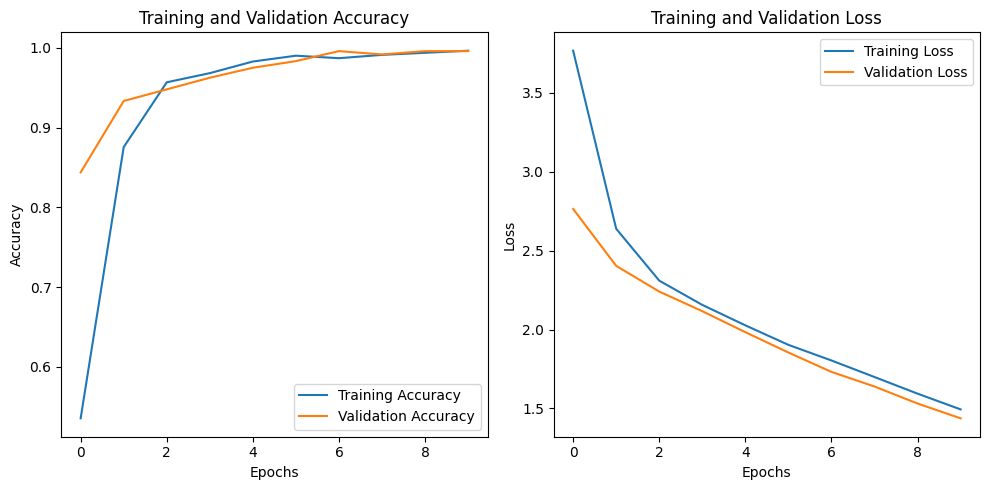

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from ipywidgets import FileUpload, Image, VBox
from PIL import Image as PILImage
import io
import numpy as np
import tensorflow as tf

# Daftar kelas yang sesuai dengan model Anda
class_names = ['bat', 'butterfly', 'cat', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'squirrel', 'tiger']

# Load model (gunakan model Anda sendiri)
model = tf.keras.models.load_model('/content/model_v7.h5')

# Membuat widget untuk mengupload file
upload = FileUpload(accept='image/*', multiple=False)

# Membuat widget Image untuk menampilkan gambar dengan ukuran tampilan yang disesuaikan
image_widget = Image()

# Fungsi untuk memproses gambar setelah diupload
def process_uploaded_image(change):
    # Mendapatkan file yang diupload
    img_data = next(iter(upload.value.values()))['content']

    # Membuka gambar dengan PIL
    img = PILImage.open(io.BytesIO(img_data))

    # Menampilkan gambar yang diupload pada widget
    img_resized = img.resize((400, 400))  # Mengubah ukuran gambar sesuai keinginan
    img_bytes = io.BytesIO()
    img_resized.save(img_bytes, format='PNG')
    img_bytes.seek(0)

    image_widget.value = img_bytes.read()  # Update widget image dengan gambar yang sudah diubah ukurannya
    image_widget.width = 300  # Atur lebar tampilan gambar
    image_widget.height = 300  # Atur tinggi tampilan gambar

    # Mengubah ukuran gambar sesuai input model (224x224)
    img_resized_for_model = img.resize((224, 224))

    # Mengubah gambar menjadi array numpy
    img_array = np.array(img_resized_for_model)

    # Menambah dimensi batch
    img_array = np.expand_dims(img_array, axis=0)

    # Normalisasi (sesuai dengan model yang digunakan)
    img_array = img_array / 255.0

    # Melakukan prediksi
    classes = model.predict(img_array)

    # Mengidentifikasi kelas berdasarkan prediksi
    predicted_class = np.argmax(classes, axis=1)

    # Menampilkan nama kelas prediksi
    predicted_class_name = class_names[predicted_class[0]]
    print(f'Predicted Class: {predicted_class_name}')

# Menyambungkan fungsi dengan upload event
upload.observe(process_uploaded_image, names='value')

# Tampilkan widget upload dan gambar
display(VBox([upload, image_widget]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: tiger


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Mengevaluasi Model dengan Dataset Validasi
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Mendapatkan Prediksi dan Label Asli
y_true = validation_generator.classes  # Label sebenarnya
y_pred_prob = model.predict(validation_generator, verbose=1)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# 3. Menghitung dan Menampilkan Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# 4. Menghasilkan Laporan Klasifikasi (Precision, Recall, F1 Score)
target_names = list(validation_generator.class_indices.keys())  # Nama kelas
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print("Classification Report:")
print(report)

# 5. Menghitung Error Rate
error_rate = 1 - val_accuracy
print(f"Error Rate: {error_rate:.4f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - accuracy: 0.9989 - loss: 1.4810
Validation Loss: 1.4798
Validation Accuracy: 0.9979
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 252ms/step
Confusion Matrix:
[[48  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0  1 47  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0  0  0 48]]
Classification Report:
              precision    recall  f1-score   support

         bat     1.0000    1.0000    1.0000        48
   butterfly     1.0000    1.0000    1.0000        48
         cat     1.0000    1.0000    1.0000        48
         cow     1.0000    1.0000    1.0000        48
         dog     1.0000    1.0000    1.0000        48
    elephant     0.9796    1.0000    0.9897        48
       horse     1.0000    0.9792    0.9895        48
       sheep     1.0000    

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.9841 - loss: 1.4406
Validation Loss: 1.4289
Validation Accuracy: 0.9937
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step


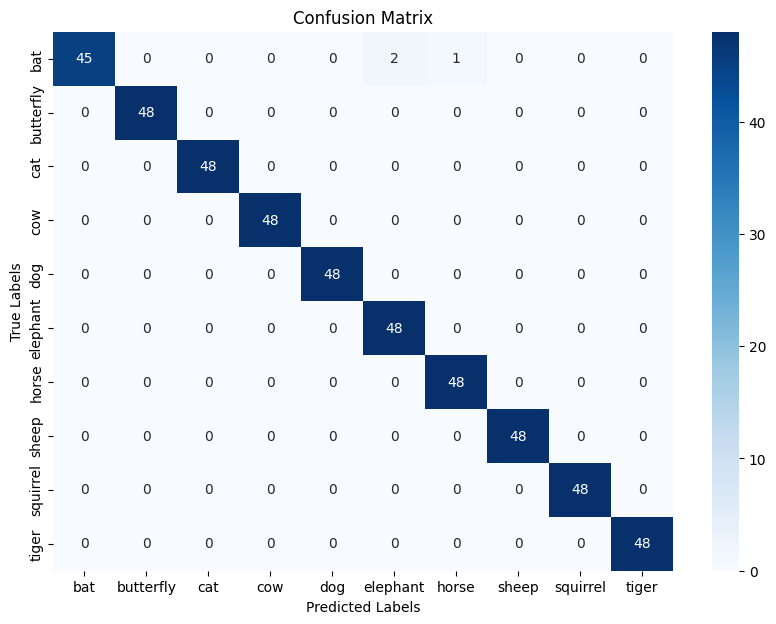

Classification Report:
              precision    recall  f1-score   support

         bat     1.0000    0.9375    0.9677        48
   butterfly     1.0000    1.0000    1.0000        48
         cat     1.0000    1.0000    1.0000        48
         cow     1.0000    1.0000    1.0000        48
         dog     1.0000    1.0000    1.0000        48
    elephant     0.9600    1.0000    0.9796        48
       horse     0.9796    1.0000    0.9897        48
       sheep     1.0000    1.0000    1.0000        48
    squirrel     1.0000    1.0000    1.0000        48
       tiger     1.0000    1.0000    1.0000        48

    accuracy                         0.9938       480
   macro avg     0.9940    0.9938    0.9937       480
weighted avg     0.9940    0.9938    0.9937       480

Error Rate: 0.0063


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 1. Mengevaluasi Model dengan Dataset Validasi
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# 2. Mendapatkan Prediksi dan Label Asli
y_true = validation_generator.classes  # Label sebenarnya
y_pred_prob = model.predict(validation_generator, verbose=1)  # Prediksi probabilitas
y_pred = np.argmax(y_pred_prob, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# 3. Menghitung Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 4. Menampilkan Confusion Matrix Berwarna
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 5. Menghasilkan Laporan Klasifikasi (Precision, Recall, F1 Score)
target_names = list(validation_generator.class_indices.keys())  # Nama kelas
report = classification_report(y_true, y_pred, target_names=target_names, digits=4)
print("Classification Report:")
print(report)

# 6. Menghitung Error Rate
error_rate = 1 - val_accuracy
print(f"Error Rate: {error_rate:.4f}")